**THE SPARKS FOUNDATION**

*Data Science And Business Analytics* (**GRIP April 2022**)

TASK 1 : PREDICTION USING SUPERVISED ML

Problem : Predict the percentage of the students based on the number of study hours.

AUTHOR : NAJEEBA KA


   **1.IMPORTING REQUIRED LIBRARIES FOR THE TASK**
   

In [3]:
#Importing required libraries
import pandas as pd   #For dataset manipulation and analysis
import numpy as np    #For mathematical operations & calculations
import matplotlib.pyplot as plot  #For Graphical Visualizations 
%matplotlib inline
import seaborn as sbn  #For making statistical graphics


**2.READING DATASET**

In [4]:
#Loading data from link
link =r"http://bit.ly/w-data"
df = pd.read_csv(link)
print("Data loaded")

Data loaded


In [5]:
#Display first 10 rows of loaded dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Checking the dimension of dataset
df.shape

(25, 2)

In [7]:
df.describe() #to display statistical summary of the dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.corr() #to find correlation between coloumns of the dataframe

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
#Checking whether any null values there in the dataset
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


From above analysis we came to know that there is no null value so no need to remove any outliers.

**3.DATA VISUALIZATION**

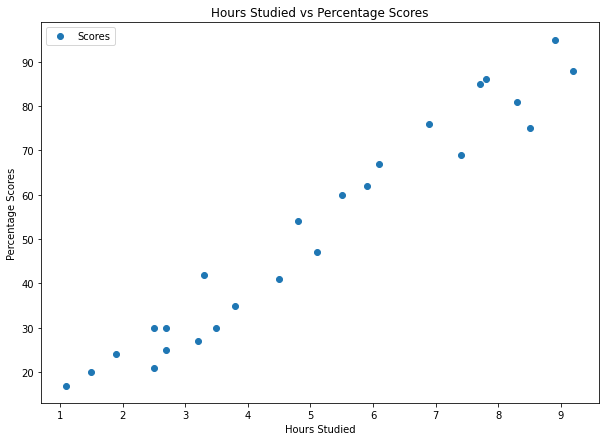

In [10]:
# Plotting the graph to see the relation and distribution of datapoints.

df.plot(x="Hours", y="Scores",figsize=(10,7),style="o")
plot.title("Hours Studied vs Percentage Scores")
plot.xlabel("Hours Studied")
plot.ylabel("Percentage Scores")
plot.show()

As the Percentage of marks increases with increase of Hours studied, there is a positive relationship between both. From the slope of the curve it is clear that the relation is linear. So there is a postive linear relationship between 'Hours Studied' and 'Percentage Scores'

Text(0.5, 1.0, 'Plotting the regression line')

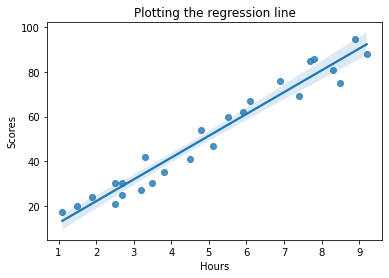

In [11]:
sbn.regplot(x="Hours",y="Scores",data=df)
plot.title("Plotting the regression line")

It is clear that scores and hours are strongly correlated. 

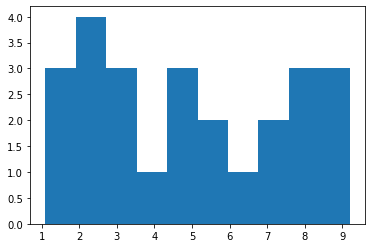

In [12]:
# Distrubution of Hours data

plot.hist(x="Hours",data=df)
plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


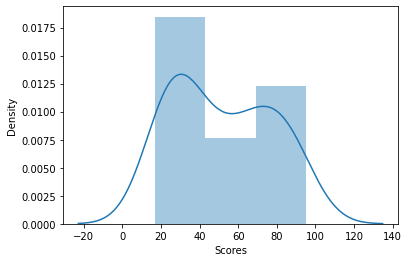

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


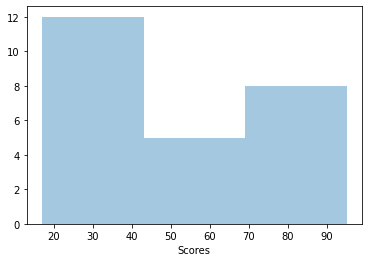

In [13]:
 # Distrubution of Scores data
sbn.distplot(df["Scores"])
plot.show()

sbn.distplot(df["Scores"], kde=False, rug=False)
plot.show()


**4.DATA PREPARATION**

In [14]:
#Dividing the Dataset into "attributes" (inputs) and "labels" (outputs).

X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

   Split this data into train and test data using train_test_split() method from the scikit learn library

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


**5.TRAINING THE MODEL**


 We have to train our data using linear regression algorithm and check the values for test data

In [16]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()


 Plot the regression line in the scatter plot

In [17]:
r_line= lr.coef_*X+lr.intercept_  # coefficients and intercepts of data points

Text(0, 0.5, 'Scores')

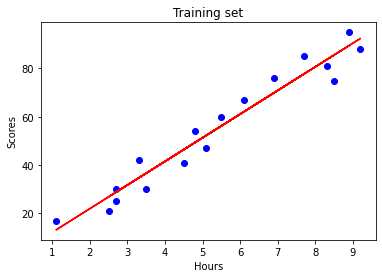

In [18]:
#Visualizing the Training Dataset

plot.scatter(x_train,y_train,color='blue')
plot.title('Training set')
plot.plot(x_train,lr.predict(x_train),color='red')
plot.xlabel('Hours')
plot.ylabel('Scores')

**6.MAKING PREDICTIONS**


 We have done with model training , now we have to make some predictions

In [19]:
y_pred =lr.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

Comparing actual Vs predicted values

In [20]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Visualising  Actual scores and predicted scores

In [21]:
#Score for test data

accuracy=lr.score(x_test, y_test)   
print("Accuracy:",accuracy*100)

Accuracy: 95.68211104435257


**What will be the predicted score if a student studies for 9.25 hours per day?**


In [22]:
# We can test for any input
# Here we are calculating the score for 9.25 studied hrs 

hours=[[9.25]]
pred = lr.predict(hours)
pred

array([92.91505723])

According to regression,if a student studies for 9.25 hours per day, the score will be 93.69.

**7.MODEL EVALUATION**


In this step we have to evaluate the performance of algorithm. We can evaluate this by calculating mean squared error or mean absolute error.

*MEAN  ABSOLUTE  ERROR*

In [23]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",MAE)

Mean Absolute Error:  4.419727808027651


*MEAN SQUARED ERROR*

In [24]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  22.965097212700428


Small value of Mean Absolute Error states that the model is quite good














**THANK YOU.**
